In [4]:
## Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Dataset Description

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.

In [5]:
## Read Data
data=pd.read_csv('H:\Full stack data science-Python pratice\Machine Learning\Machine-Learning-Algorithms\Datasets for Algorithms\Handwriting_classifier.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
## shape
data.shape

(42000, 785)

In [15]:
## Extract X and Y
X=data.iloc[:,1:].values
Y=data.iloc[:,0].values

In [16]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [17]:
X_train.shape

(33600, 784)

In [18]:
## Decision tree without parameters
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

## Training
clf.fit(X_train,Y_train)

## Prediction
Y_pred=clf.predict(X_test)

## Accuracy
from sklearn.metrics import r2_score,accuracy_score
print("R2 Score=",r2_score(Y_test,Y_pred))
print("Accuracy Score=",accuracy_score(Y_test,Y_pred))

R2 Score= 0.717538267759873
Accuracy Score= 0.8591666666666666


In [20]:
## Dictionary for parameter tuning
param_dict={
    'criterion':['gini','entropy'],
    'max_depth':[1,2,3,4,5,6,None]
}

## Create grid search cv object
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(clf,param_grid=param_dict,cv=2)

## Training
grid.fit(X_train,Y_train)

## Prediction
Y_pred_grid=grid.predict(X_test)

## Accuracy
print("R2 Score=",r2_score(Y_test,Y_pred_grid))
print("Accuracy Score=",accuracy_score(Y_test,Y_pred_grid))
print("Best Estimator:",grid.best_estimator_)
print("Best Parameter:",grid.best_params_)
print("Best Score:",grid.best_score_)

R2 Score= 0.7280515901507104
Accuracy Score= 0.8614285714285714
Best Estimator: DecisionTreeClassifier(criterion='entropy')
Best Parameter: {'criterion': 'entropy', 'max_depth': None}
Best Score: 0.8420535714285714


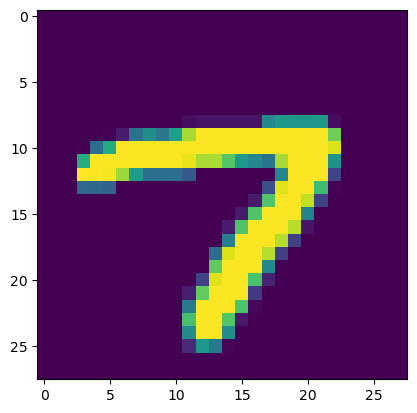

In [22]:
## Check the prediction for X_test[100] which is 7.
plt.imshow(X_test[100].reshape(28,28))

In [25]:
## Actual prediction as well gives 7
clf.predict(X_test[100].reshape(1,784))

array([7], dtype=int64)